# Setup

In [264]:
import datetime
import numpy as np
import pandas as pd
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV, PredefinedSplit

In [2]:
pd.options.display.max_columns = 999

In [3]:
def display_df(df, n=1, tail=False, title=None):
    if title:
        print(title + ':')
    display(df.head(n), df.tail(n), df.shape) if tail else display(df.head(n), df.shape)

In [4]:
data_interim_dir = '../data/interim/'

# Read Data

In [5]:
df_interim = pd.read_csv(data_interim_dir + 'model_dataset.csv')
df_interim_sub = pd.read_csv(data_interim_dir + 'submission_dataset.csv')

In [6]:
display_df(df_interim, n=5, tail=True)
display_df(df_interim_sub, n=2)

,Season,Label,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
0,1985.0,1.0,1116.0,1234.0,9.0,8.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,1.0,0.0
1,1985.0,0.0,1116.0,1385.0,9.0,1.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,8.0,0.0
2,1985.0,1.0,1207.0,1385.0,1.0,1.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.0,0.0
3,1985.0,0.0,1246.0,1385.0,12.0,1.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.77772

,Season,Label,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
2137,2018.0,0.0,1139.0,1345.0,10.0,2.0,14.000000,12.696970,2.939394,3.363636,24.787879,24.575758,61.848485,23.000000,21.000000,55.939394,29.212121,8.181818,7.848485,25.181818,16.242424,19.636364,12.515152,14.575758,0.181818,9.212121,8.121212,18.242424,16.878788,79.121212,72.787879,6.727273,5.151515,11.181818,14.151515,16.705882,12.029412,5.029412,2.382353,26.588235,22.029412,56.705882,22.823529,20.588235,59.794118,28.176471,9.588235,6.941176,24.529412,20.470588,14.205882,15.205882,9.647059,0.029412,8.441176,10.441176,15.529412,18.647059,81.147059,65.647059,5.823529,5.205882,10.676471,12.088235,-2.705882,0.667558,-2.090018,0.981283,-1.800357,2.546346,5.142602,-3.854724,0.176471,0.411765,1.035651,0.652406,-1.406417,0.907308,-4.228164,5.430481,-2.690731,4.928699,0.770945,-2.319964,2.713012,-1.768271,-2.025847,7.140820,0.903743,-0.054367,0.505348,2.063280,8.0,0.152406
2138,2018.0,1.0,1393.0,1395.0,11.0,6.0,10.969697,16.181818,5.575758,3.181818,25.333333,22.393939,54.424242,18.181818,24.181818,55.272727,22.757576,5.848485,7.939394,21.878788,21.848485,17.303030,16.181818,12.848485,0.121212,12.090909,10.484848,16.303030,18.393939,67.545455,64.545455,7.242424,6.303030,12.575758,12.848485,18.781250,15.718750,3.593750,4.250000,25.187500,21.312500,60.156250,21.156250,21.343750,59.406250,30.000000,8.468750,8.093750,27.281250,20.531250,18.218750,14.531250,13.281250,0.156250,11.250000,8.812500,16.906250,18.625000,83.000000,75.937500,6.593750,6.250000,12.687500,12.593750,-7.811553,0.463068,1.982008,-1.068182,0.145833,1.081439,-5.732008,-4.133523,-2.974432,2.838068,-7.242424,-5.402462,-2.620265,-0.154356,1.317235,-0.915720,1.650568,-0.432765,0.840909,1.672348,-0.603220,-0.231061,-15.454545,-11.392045,0.648674,0.053030,-0.111742,0.254735,5.0,-0.035038
2139,2018.0,1.0,1420.0,1438.0,16.0,1.0,14.870968,13.580645,2.548387,2.806452,24.354839,27.129032,58.451613,25.774194,23.161290,56.612903,25.612903,9.838710,8.322581,25.322581,17.580645,17.580645,11.419355,12.000000,0.000000,9.709677,9.935484,16.516129,18.774194,72.483871,70.967742,7.387097,6.258065,11.677419,14.322581,13.727273,8.848485,3.727273,2.636364,24.272727,22.212121,54.181818,18.878788,20.303030,50.151515,25.000000,7.363636,6.151515,18.818182,13.424242,13.121212,10.181818,9.606061,0.030303,8.393939,8.393939,14.060606,15.060606,67.545455,53.393939,6.787879,3.878788,8.575758,12.727273,1.143695,4.732160,-1.178886,0.170088,0.082111,4.916911,4.269795,6.461388,6.895406,2.858260,0.612903,6.504399,2.475073,2.171065,4.156403,4.459433,1.237537,2.393939,1.315738,1.541544,2.455523,3.713587,4.938416,17.573803,0.599218,2.379277,3.101662,1.595308,15.0,-0.030303
2140,2018.0,1.0,1243.0,1420.0,9.0,16.0,14.333333,12.666667,3.000000,2.454545,22.393939,23.060606,54.878788,20.181818,21.363636,53.787879,25.878788,6.939394,7.090909,23

(2142, 94)

,Season,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
0,2014,1107,1110,16,15,11.0625,12.34375,3.0625,3.03125,24.21875,21.59375,51.09375,13.46875,19.59375,54.34375,22.4375,4.90625,6.90625,22.75,21.71875,15.84375,16.25,11.4375,0.09375,10.34375,9.9375,17.25,19.25,66.03125,63.84375,5.53125,5.84375,12.625,11.96875,15.125000,10.093750,3.437500,2.437500,22.937500,19.312500,46.5625,16.593750,15.062500,49.03125,23.031250,6.343750,4.718750,20.156250,16.250000,20.187500,11.531250,13.593750,0.031250,7.125000,9.781250,17.218750,17.625000,63.937500,58.625000,6.031250,7.031250,13.968750,12.125000,-4.062500,2.250000,-0.375000,0.593750,1.281250,2.281250,4.53125,5.31250,-3.125000,4.531250,-0.593750,2.593750,-1.437500,2.187500,5.468750,-4.343750,4.718750,-2.156250,3.218750,0.156250,0.031250,1.625000,2.093750,5.218750,-0.500000,-1.187500,-1.343750,-0.156250,1,0.062500
1,2014,1107,1112,16,1,11.0625,12.34375,3.0625,3.03125,24.21875,21.59375,51.09375,13.46875,19.59375,54.34375,22.4375,4.90625,6.90625,22.75,21.71875,15.84375,16.25,11.4375,0.09375,10.34375,9.9375,17.25,19.25,66.03125,63.84375,5.53125,5.84375,12.625,11.96875,15.088235,9.176471,4.235294,3.176471,26.294118,21.205882,56.0000,14.852941,14.029412,53.50000,26.235294,5.294118,4.411765,20.382353,23.352941,18.441176,15.294118,12.970588,0.088235,12.588235,9.235294,16.441176,18.617647,73.058824,58.147059,5.882353,4.764706,10.441176,12.411765,-4.025735,3.167279,-1.172794,-0.145221,-2.075368,0.387868,-4.90625,0.84375,-1.384191,5.564338,-3.797794,2.367647,-0.387868,2.494485,-1.634191,-2.597426,0.955882,-1.533088,-2.244485,0.702206,0.808824,0.632353,-7.027574,5.696691,-0.351103,1.079044,2.183824,-0.443015,15,0.005515


(11390, 93)

# Train / Validation Split

In [261]:
df_train = df_interim.loc[df_interim.Season.isin(np.arange(1985, 2014))]
df_valid = df_interim.loc[df_interim.Season.isin(np.arange(2014, 2019))]

# Train Model

In [ ]:
features = list(set(df_interim.columns) - set(['Label', 'Season', 'TeamOneID', 'TeamTwoID']))

In [292]:
# Create custom cross validator object based off train-validation split
test_fold = np.concatenate((np.zeros(len(df_train)) - 1, np.zeros(len(df_valid))))
ps_cv = PredefinedSplit(test_fold)

# Hyper-parameter optimization
parameters = {
    'min_samples_split': [25, 50, 75],
    'n_estimators': [100, 500],
    'random_state': [3]
}
clf = RandomForestClassifier()
gridcv = GridSearchCV(clf, parameters, cv=ps_cv, scoring='neg_log_loss', 
                      error_score='raise', n_jobs=2, return_train_score=True)

X = df_interim[features].values
y = df_interim.Label.values
gridcv.fit(X, y)
print(gridcv.best_params_)

{'min_samples_split': 50, 'n_estimators': 500, 'random_state': 3}

In [294]:
clf = gridcv.best_estimator_

# Analyze Model

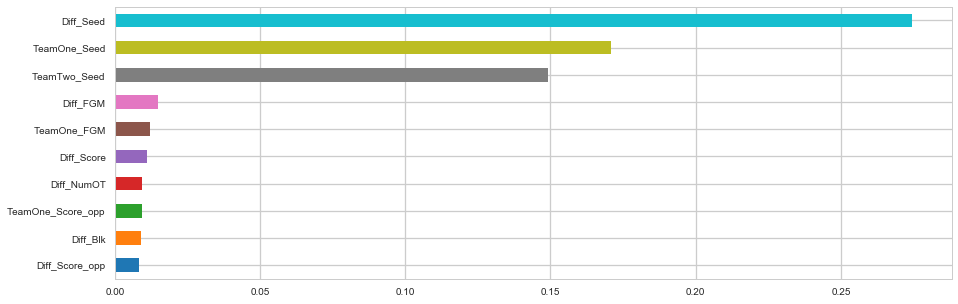

In [295]:
(
    pd.Series(clf.feature_importances_, index=df_train[features].columns)
    .nlargest(n=10)
    .sort_values()
    .plot(kind='barh', figsize=(15, 5), fontsize=10)

)
plt.show()

# Make Predictions

In [296]:
def clip_preds(y):
    """TBD"""
    return np.clip(y, 0.05, 0.95)

In [297]:
# Train score
yp_train = clip_preds(clf.predict_proba(X_train)[:, 1])
score_train = log_loss(y_train, yp_train, normalize=True)
acc_train = sum(np.round(yp_train) == y_train) / len(y_train)

print("Logloss:", score_train)
print("Accuracy:", acc_train)

Logloss: 0.45957561273
Accuracy: 0.810071154899


In [298]:
y_valid = df_valid.Label.values
X_valid = df_valid[features].values

# Validation score
yp_valid = clip_preds(clf.predict_proba(X_valid)[:, 1])
score_valid = log_loss(y_valid, yp_valid, normalize=True)
acc_valid = sum(np.round(yp_valid) == y_valid) / len(y_valid)

print("Logloss:", score_valid)
print("Accuracy:", acc_valid)

Logloss: 0.590120694632
Accuracy: 0.692063492063


# Analyze Predictions

In [285]:
def compute_logloss(df):
    df['Logloss']= -1 * (df.Label * np.log(df.Pred) + (1 - df.Label) * np.log(1 - df.Pred))
    return df

def cols_to_front(df, front_cols):
    cols = list(df)
    front_cols.reverse()
    for col in front_cols:
        cols.insert(0, cols.pop(cols.index(col)))
    
    return df.loc[:, cols]

        
df_train_pred = (
    df_train
    .assign(Pred=yp_train)
    .pipe(compute_logloss)
    .sort_values('Logloss', ascending=False)
    .pipe(cols_to_front, front_cols=['Logloss', 'Label', 'Pred'])
)

df_valid_pred = (
    df_valid
    .assign(Pred=yp_valid)
    .pipe(compute_logloss)
    .sort_values('Logloss', ascending=False)
    .pipe(cols_to_front, front_cols=['Logloss', 'Label', 'Pred'])      
)

In [286]:
display_df(df_train_pred, n=5, tail=True, title='Training Prediction Errors')
display_df(df_valid_pred, n=5, tail=True, title='Validation Prediction Errors')

Training Prediction Errors:


,Logloss,Label,Pred,Season,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
526,2.995732,0.0,0.950000,1993.0,1112.0,1365.0,2.0,15.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,-13.0,0.0
803,2.501658,1.0,0.081949,1997.0,1164.0,1376.0,15.0,2.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,13.0,0.0
413,2.501658,1.0,0.081949,1991.0,1350.0,1393.0,15.0,2.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,13.0,0.0
1025,2.501658,1.0,0.081949,2001.0,1214.0,1235.0,15.0,2.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,1

,Logloss,Label,Pred,Season,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
834,0.051293,1.0,0.95,1998.0,1153.0,1319.0,2.0,15.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,-13.0,0.0
838,0.051293,1.0,0.95,1998.0,1163.0,1192.0,2.0,15.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,-13.0,0.0
853,0.051293,1.0,0.95,1998.0,1181.0,1347.0,1.0,16.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,-15.0,0.0
143,0.051293,1.0,0.95,1987.0,1314.0,1335.0,1.0,16.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.0588

(1827, 96)

Validation Prediction Errors:


,Logloss,Label,Pred,Season,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
1996,1.438702,0.0,0.762765,2016.0,1277.0,1292.0,2.0,15.0,20.558824,10.617647,5.147059,3.235294,29.558824,20.735294,59.529412,21.029412,18.794118,57.823529,28.794118,9.117647,5.676471,21.794118,17.882353,19.676471,13.058824,14.117647,0.058824,12.294118,9.352941,19.088235,17.558824,79.764706,63.382353,4.411765,5.323529,11.794118,9.558824,13.032258,11.451613,3.483871,2.774194,26.548387,26.064516,57.709677,20.580645,18.354839,54.322581,25.903226,8.000000,6.258065,23.225806,20.612903,23.225806,12.516129,15.516129,0.032258,10.258065,9.064516,20.451613,18.838710,72.322581,68.225806,6.258065,5.838710,11.935484,13.516129,7.526565,-0.833966,1.663188,0.461101,3.010436,-5.329222,1.819734,3.500949,0.448767,0.439279,2.890892,-1.431689,1.117647,-0.581594,-2.730550,-3.549336,0.542694,-1.398482,2.036053,0.288425,-1.363378,-1.279886,7.442125,-4.843454,-1.846300,-0.515180,-0.141366,-3.957306,-13.0,0.026565
2022,1.351831,0.0,0.741234,2017.0,1112.0,1462.0,2.0,11.0,13.794118,12.647059,3.235294,3.000000,26.470588,20.558824,55.088235,16.941176,20.941176,57.205882,26.205882,6.735294,6.411765,23.764706,22.588235,16.676471,17.117647,11.500000,0.000000,10.294118,9.382353,16.970588,19.794118,76.264706,65.441176,5.500000,4.735294,11.441176,11.911765,14.852941,14.058824,2.676471,3.823529,25.382353,22.500000,56.735294,20.676471,22.000000,56.088235,25.764706,7.029412,7.441176,25.352941,23.352941,18.882353,16.058824,13.205882,0.029412,12.205882,8.470588,18.764706,21.382353,74.617647,71.352941,6.147059,6.411765,12.794118,12.235294,-1.058824,-1.411765,0.558824,-0.823529,1.088235,-1.941176,-1.647059,1.117647,-3.735294,-1.058824,0.441176,-1.588235,-0.294118,-1.029412,-0.764706,-2.205882,1.058824,-1.705882,-1.911765,0.911765,-1.794118,-1.588235,1.647059,-5.911765,-0.647059,-1.676471,-1.352941,-0.323529,-9.0,-0.029412
2010,1.329909,1.0,0.264501,2016.0,1458.0,1462.0,7.0,2.0,11.593750,10.687500,3.187500,3.312500,23.468750,22.562500,54.625000,18.437500,15.593750,53.281250,23.468750,6.593750,5.906250,22.875000,21.687500,18.250000,15.343750,12.906250,0.062500,11.437500,9.218750,16.937500,20.375000,68.875000,64.562500,5.875000,5.281250,10.968750,12.156250,16.375000,13.593750,3.062500,3.468750,27.937500,23.531250,60.562500,21.000000,23.937500,59.187500,27.375000,7.593750,7.531250,24.593750,26.000000,20.343750,19.000000,14.312500,0.000000,13.062500,9.968750,20.187500,23.156250,81.343750,71.031250,7.312500,6.093750,12.750000,14.125000,-4.781250,-2.906250,0.125000,-0.156250,-4.468750,-0.968750,-5.937500,-5.906250,-2.562500,-8.343750,-3.906250,-1.718750,-1.000000,-1.625000,-4.312500,-2.093750,-3.656250,-1.406250,-1.625000,-0.750000,-3.250000,-2.781250,-12.468750,-6.468750,-1.437500,-0.812500,-1.781250,-1.968750,5.0,0.062500
2139,1.300550,1.0,0.272382,2018.0,1420.0,1438.0,16.0,1.0,14.870

,Logloss,Label,Pred,Season,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Seed,Diff_NumOT
1827,0.155140,0.0,0.143705,2014.0,1107.0,1196.0,16.0,1.0,11.062500,12.343750,3.062500,3.031250,24.218750,21.593750,51.093750,13.468750,19.593750,54.343750,22.437500,4.906250,6.906250,22.750000,21.718750,15.843750,16.250000,11.437500,0.093750,10.343750,9.937500,17.250000,19.250000,66.031250,63.843750,5.531250,5.843750,12.625000,11.968750,13.352941,9.617647,2.852941,3.029412,24.000000,20.970588,52.764706,18.617647,16.176471,51.382353,24.382353,6.852941,5.382353,20.500000,22.882353,16.764706,15.117647,11.558824,0.029412,11.676471,9.882353,16.205882,19.352941,70.735294,57.941176,7.205882,5.647059,11.323529,13.970588,-2.290441,2.726103,0.209559,0.001838,0.218750,0.623162,-1.670956,2.961397,-5.148897,3.417279,-1.944853,2.250000,-1.946691,1.523897,-1.163603,-0.920956,1.132353,-0.121324,-1.332721,0.055147,1.044118,-0.102941,-4.704044,5.902574,-1.674632,0.196691,1.301471,-2.001838,15.0,0.064338
1984,0.155138,0.0,0.143703,2016.0,1195.0,1314.0,16.0,1.0,12.896552,12.034483,4.034483,3.310345,27.965517,24.862069,60.068966,14.655172,22.068966,60.103448,28.206897,5.068966,6.827586,25.482759,21.862069,21.689655,14.103448,15.068966,0.241379,11.448276,10.586207,19.620690,18.896552,75.586207,72.862069,6.137931,6.620690,12.000000,11.551724,18.117647,11.264706,4.382353,3.088235,26.941176,21.264706,64.323529,17.147059,21.411765,60.205882,30.794118,5.382353,7.705882,24.676471,20.735294,17.882353,15.294118,12.500000,0.000000,14.029412,11.441176,17.911765,18.205882,82.264706,69.558824,6.882353,5.764706,10.911765,13.147059,-5.221095,0.769777,-0.347870,0.222110,1.024341,3.597363,-4.254564,-0.102434,-2.491886,0.657201,-2.587221,0.806288,-0.313387,-0.878296,1.126775,3.807302,-1.190669,2.568966,-2.581136,-0.854970,1.708925,0.690669,-6.678499,3.303245,-0.744422,0.855984,1.088235,-1.595335,15.0,0.241379
1892,0.149503,1.0,0.861136,2015.0,1181.0,1352.0,1.0,16.0,15.515152,11.969697,3.757576,3.151515,25.181818,20.303030,56.969697,19.636364,16.181818,58.515152,28.606061,7.575758,5.181818,25.121212,22.878788,14.636364,15.818182,10.151515,0.060606,12.151515,10.818182,16.000000,19.303030,80.606061,65.575758,7.181818,5.696970,11.242424,12.575758,12.242424,14.484848,2.939394,3.484848,23.000000,22.909091,54.484848,16.818182,20.121212,55.606061,24.303030,6.393939,6.727273,23.575758,19.606061,20.909091,14.000000,13.848485,0.060606,10.424242,12.848485,18.545455,17.969697,69.000000,67.727273,8.545455,6.545455,13.757576,14.606061,3.272727,-2.515152,0.818182,-0.333333,2.181818,-2.606061,2.484848,2.909091,2.818182,-3.939394,4.303030,1.545455,1.181818,-1.545455,3.272727,-6.272727,1.818182,-3.696970,1.727273,-2.030303,-2.545455,1.333333,11.606061,-2.151515,-1.363636,-0.848485,-2.515152,-2.030303,-15.0,0.000000
2073,0.125402,0.0,0.117858,2017.0,1240.0,1257.0,15.0,2.0,13.812500,11.500000,3.

(315, 96)

# Save Outputs

In [287]:
# Create model name
now = datetime.datetime.now()
model_name = "clf_{year}{month:02}{day:02}{hour:02}".format(
    year=now.year, month=now.month, day=now.day, hour=now.hour)

In [288]:
# Save model
f = open('../models/{name}.model'.format(name=model_name), 'wb')
pickle.dump(clf, f)
f.close()

In [289]:
# Save model report
f = open('../models/{name}_report.txt'.format(name=model_name), 'w')
f.write('Training Score: {score:9.5f}\n'.format(score=score_train))
f.write('Validation Score: {score:.5f}\n'.format(score=score_valid))
f.close()

In [299]:
# Create submission file
def create_ID(row):
    """TBD"""
    return str(row.Season.astype(int)) + '_' + str(row.TeamOneID.astype(int)) + '_' + str(row.TeamTwoID.astype(int))

X_sub = df_interim_sub[features].values

df_final_sub = (
    df_interim_sub
    .assign(Pred=clip_preds(clf.predict_proba(X_sub)[:, 1]))
    .assign(ID=df_interim_sub.apply(create_ID, axis=1))
    .loc[:, ['ID', 'Pred']]
)

# Save submssion file
df_final_sub.to_csv('../models/{name}_submission.csv'.format(name=model_name), index=False)